In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from utils import *
import os
from PIL import Image
from sklearn.cluster import KMeans

In [ ]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)
    return idx


In [ ]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        if points.size != 0:
            centroids[k] = np.mean(points, axis=0)
    return centroids


In [ ]:
def kMeans_init_centroids(X, K):
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    return centroids


In [ ]:
def plot_kMeans_RGB(X, centroids, idx, K):
    """
    Plots the data points in RGB space, colored by their assigned centroid.

    Args:
        X (np.ndarray): The data points (image pixels).
        centroids (np.ndarray): The cluster centroids.
        idx (np.ndarray): The index of the closest centroid for each data point.
        K (int): The number of clusters.
    """
    plt.figure(figsize=(8, 8))
    for i in range(K):
        points = X[idx == i]
        plt.scatter(points[:, 0], points[:, 1], c=[centroids[i] / 255.0], s=1)
    plt.title('Pixel Colors Clustered')
    plt.xlabel('Red')
    plt.ylabel('Green')
    plt.show()

def show_centroid_colors(centroids):
    """
    Displays the colors of the centroids as squares.

    Args:
        centroids (np.ndarray): The cluster centroids.
    """
    plt.figure(figsize=(K, 1))
    for i in range(K):
        plt.subplot(1, K, i + 1)
        plt.imshow([[centroids[i] / 255.0]])
        plt.axis('off')
    plt.suptitle('Centroid Colors')
    plt.show()

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m, dtype=int)
    for i in range(max_iters):
        print(f"K-Means iteration {i}/{max_iters-1}")
        idx = find_closest_centroids(X, centroids)
        previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [ ]:

def count_unique_colors(img):
    return len(np.unique(np.reshape(img, (-1, img.shape[2])), axis=0))

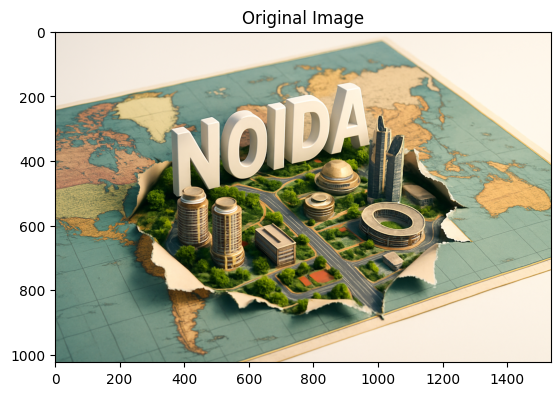

Shape of original_img is: (1024, 1536, 3)
The image contains 386835 unique colors.
Initial centroids:
[[151.02131996 171.06973664 149.3302085 ]
 [ 43.81572332  57.22214148  27.3807646 ]
 [248.75450447 236.74477799 219.29871371]
 [116.66461497 128.83578891 102.86909262]
 [217.53593771 179.16823597 123.38155147]]
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Final centroids:
[[150.23277409 170.35624685 148.64672703]
 [ 43.5334977   56.96849226  27.22999648]
 [248.75396217 236.74438222 219.29788501]
 [116.23788768 128.19159443 102.01843765]
 [217.48090892 179.14948601 123.41927933]]
Shape of idx: (1572864,)
Closest centroid for the first five elements: [2 2 2 2 2]


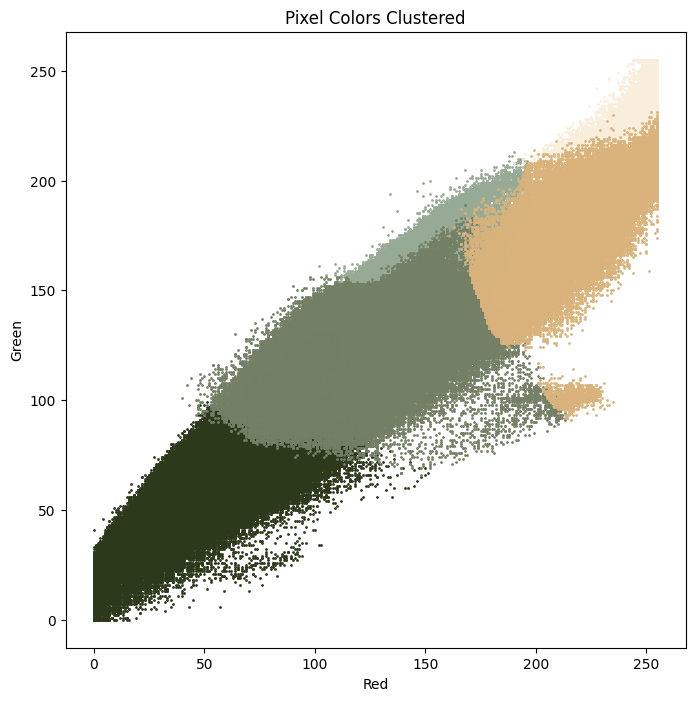

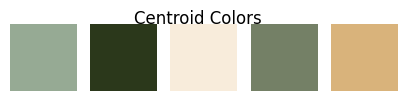

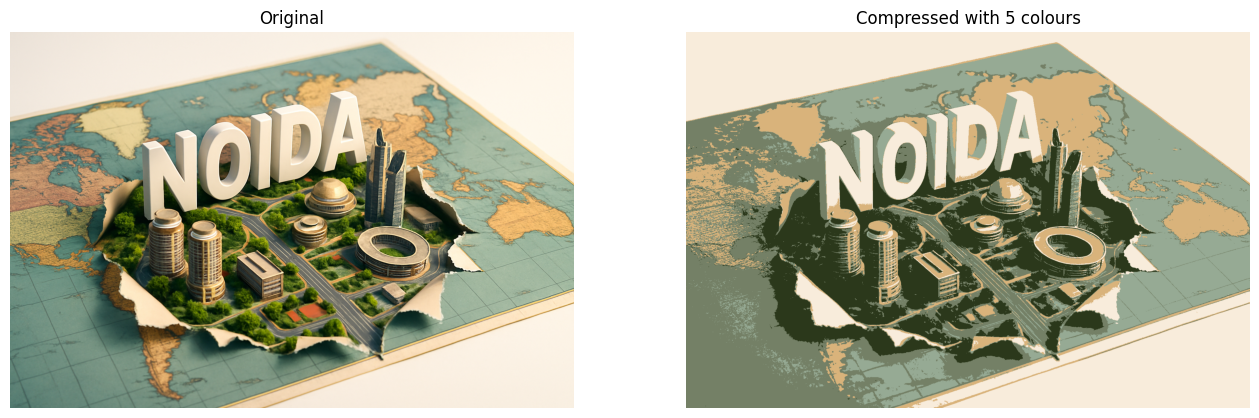

Compressed image saved as compressed_image_5_colors.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
image_file = "/content/Noida.png"  # enter the file name here
if not os.path.exists(image_file):
    print("The file does not exist. Please check the file name and try again.")
    exit()

original_img = np.array(Image.open(image_file).convert('RGB'))
plt.imshow(original_img)
plt.title('Original Image')
plt.show()
print("Shape of original_img is:", original_img.shape)

num_unique_colors = count_unique_colors(original_img)
print(f"The image contains {num_unique_colors} unique colors.")

while True:
    # K = int(input(f"Enter the number of colors to compress the image to (must be less than {num_unique_colors}): "))
    K = 5
    if K < num_unique_colors:
        break
    print(f"Please enter a number less than {num_unique_colors}.")

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3)).astype(float)
max_iters = 10

print("Initial centroids:")
initial_centroids = kMeans_init_centroids(X_img, K)
print(initial_centroids)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
print("Final centroids:")
print(centroids)
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

plot_kMeans_RGB(X_img, centroids, idx, K)
show_centroid_colors(centroids)

idx = find_closest_centroids(X_img, centroids)
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(X_recovered.astype(np.uint8))
ax[1].set_title(f'Compressed with {K} colours')
ax[1].axis('off')
plt.show()

# Save the compressed image
compressed_img = Image.fromarray(X_recovered.astype(np.uint8))
output_filename = f"compressed_image_{K}_colors.png"
compressed_img.save(output_filename)

# Provide a download link
from google.colab import files
print(f"Compressed image saved as {output_filename}")
files.download(output_filename)